# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')
# --------------------------------------------------

# --------------------------------------------------
# load datasets
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # classifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV # regressor 응용
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split       # function
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------


# --------------------------------------------------
def check_nan(df):
    nan = df.isna().sum()[df.isna().sum() != 0]
    nan_cols = list(nan.index)
    nan_cnt  = df[nan_cols].isna().sum()
    rate = round(nan_cnt / df.shape[0] * 100, 2)
    nan_df = pd.DataFrame({'NAN_CNT':nan_cnt, 'RATE':rate})
    
    print(nan_df)
    print('-' * 30)
    print('nan_cols count =', len(nan_cols))
    print(nan_cols)
 
    for col in nan_cols:
        print('-' * 30)
        print(df[col].value_counts())
        print('value_counts =', df[col].count(), '/ nan_counts =', df[col].isna().sum())
    
    return nan_cols
# nan_cols = check_nan(df)
# --------------------------------------------------

# --------------------------------------------------
def check_outliers(X_train, features, rate=1.5):
    
    dict = {}
    
    for col in features:
        
        Q1 = np.percentile(X_train[col], 25) 
        Q3 = np.percentile(X_train[col], 75) 
        IQR = Q3 - Q1
        
        min = Q1 - (rate * IQR)
        max = Q3 + (rate * IQR)
        
        idxs = X_train[(X_train[col] < min) | (X_train[col] > max)].index
        
        dict[col] = idxs
        
    return dict
# check_outliers(X_train, 'Insulin')
# --------------------------------------------------

# --------------------------------------------------
def check_object(df):
    object_cols = list(df.dtypes[df.dtypes == 'object'].index)
    print('object_cols count =', len(object_cols))
    for col in object_cols:
        print('-' * 30)
        print(df[col].value_counts())
    return object_cols
# object_cols = encode(df)
# --------------------------------------------------

# --------------------------------------------------
def mapping(df, col, dict):
    dict = {}
    
    for i in range(len(df[col].value_counts().index)):
        dict[df[col].value_counts().index[i]] = i
    
    df['e_' + col] = df[col].map(dict)
    return df['e_' + col].value_counts()
# mapping(df, 'gender')
# --------------------------------------------------

# --------------------------------------------------
def scores(y_test, y_pred):
    
    """evaluation scores"""
    
    f1        = f1_score         (y_test, y_pred, average='macro')
    accuracy  = accuracy_score   (y_test, y_pred, )
    precision = precision_score  (y_test, y_pred, average='macro')
    recall    = recall_score     (y_test, y_pred, average='macro')
    c_matrix  = confusion_matrix (y_test, y_pred, )
    
    print(
          f'accuracy  = {accuracy:.6f},  '
          f'f1 score  = {f1:.6f},  \n'
          f'precision = {precision:.6f},  '
          f'recall    = {recall:.6f},')
    print(c_matrix)
    
    # plt.figure(figsize=(12, 9))
    # plt.title('confusion matrix')
    # plt.xlabel('Predict')
    # plt.ylabel('Actual')
    # sns.heatmap(c_matrix, annot=True, linewidths=1, cmap='Blues', annot_kws={"size": 14})
    # plt.show()
# --------------------------------------------------

# --------------------------------------------------
def curves(y_test, probas_pred):
        
    FPRS, TPRS, thresholds = roc_curve(y_test, probas_pred[:, 1])
 
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
 
    # settings
    plt.subplot(121)
    plt.title('ROC curve')
    plt.gray()
    plt.xlabel('FPR(1- specificity)')
    plt.ylabel('TPR')
 
    # x, y values
    plt.plot(FPRS, TPRS, label='ROC', linestyle='solid')
    plt.plot([0, 1], [0, 1], label='50%', color='gray', linestyle=':')
    plt.legend()
 
    precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred[:, 1])
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
 
    plt.subplot(122)
    plt.title('precision recall curve')
    plt.gray()
    plt.xlabel('threshold')
    plt.ylabel('scores')
 
    # x, y values
    plt.plot(thresholds, precisions[:thresholds.shape[0]], label='precision', linestyle=':')
    plt.plot(thresholds, recalls[:thresholds.shape[0]],    label='recall',    linestyle='--')
    plt.plot(thresholds, f1_scores[:thresholds.shape[0]],  label='f1',        linestyle='solid')
    # valid linestyle = '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.legend()
 
    plt.show()
    
    print('AUC = ', roc_auc_score(y_test, probas_pred[:, 1]))
# --------------------------------------------------

# metrics imports

In [2]:
# # classification GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# classification_models = [RandomForestClassifier(),
#                          GradientBoostingClassifier(),
#                          XGBClassifier(), 
#                          XGBRFClassifier(), 
#                          LGBMClassifier(), 
#                          CatBoostClassifier(),
#                          ]

# # param_grid=
# hyper_param = {'n_estimators':[100],
#                'random_state':[0],
#               #  'min_samples_split':[2],
#               #  'min_samples_leaf':[1],
#                }

# # scoring=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# classification_cols = ['mean_test_f1_macro', 'mean_test_accuracy', 
#                        'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc_ovr',]

# # GridSearchCV loop
# for model in classification_models:
        
#         gscv = GridSearchCV(model, param_grid=hyper_param, 
#                             scoring=classification_scorers, refit='f1_macro', 
#                             cv=skf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 75)
#         print('estimtor        =', gscv.estimator)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[classification_cols]
#         met_df.columns = ['f1_macro', 'accuracy', 'precision', 'recall', 'auc_ovr',]
#         print(met_df)

In [3]:
# # classification cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # estimators=
# classification_models = [RandomForestClassifier(random_state=0),
#                          GradientBoostingClassifier(random_state=0),
#                          XGBClassifier(random_state=0),
#                          XGBRFClassifier(random_state=0),
#                          LGBMClassifier(random_state=0),
#                          CatBoostClassifier(random_state=0),
#                          ]

# # scorings=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in classification_models:
    
#     cv_results = cross_validate(model, X_met, y_met,
#                                 scoring=classification_scorers,
#                                 cv=skf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 70)
#     print('model  =', model.__class__.__name__)
#     print('params =', model.get_params(deep=True))
    
#     # classification metrics
#     print('f1_macro  = {}  '.format(cv_results['test_f1_macro'].mean()),
#           'accuracy  = {}  '.format(cv_results['test_accuracy'].mean()), '\n'
#           'precision = {}  '.format(cv_results['test_precision'].mean()),
#           'recall    = {}  '.format(cv_results['test_recall'].mean()), '\n'
#           'AUC_ovr   = {}  '.format(cv_results['test_roc_auc_ovr'].mean()),
#           )
    
#     fi_list = []
#     for idx, estimator in enumerate(cv_results['estimator']):
#         fi = pd.DataFrame(estimator.feature_importances_, 
#                           index=X_met.columns, columns=['importance']).sort_values('importance', ascending=False)
        
#         fi_list.append(estimator.feature_importances_.tolist())
#     fi_means = np.array(fi_list).mean(axis=0)
#     fi_df = pd.DataFrame(fi_means, columns=['importance'], index=X_met.columns).sort_values(by='importance', ascending=False)
#     fig, ax = plt.subplots(figsize=(16, 12))
#     sns.set_theme(style='whitegrid')
#     sns.set_color_codes('pastel')
#     sns.barplot(x='importance', y_met=X_met.columns, data=fi_df)
#     plt.show()

In [4]:
# # regression cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'count'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_train_test_met = train_met.drop(target_met, axis=1)
# y_train_test_met = train_met[target_met]

# # estimators=
# regressor_models = [
#                     LinearRegression      (),
#                     DecisionTreeRegressor (random_state=0),
#                     Ridge                 (random_state=0),
#                     Lasso                 (random_state=0),
#                     ElasticNet            (random_state=0),
#                     RandomForestRegressor (random_state=0),
#                     XGBRegressor          (random_state=0),
#                     LGBMRegressor         (random_state=0),
#                     CatBoostRegressor     (random_state=0, verbose=0),
#                     ]

# # scorings=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in regressor_models:
    
#     cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
#                                 scoring=regressor_scorers,
#                                 cv=kf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 40)
#     print('model  =', model.__class__.__name__)
#     # print('params =', model.get_params(deep=True))
    
#     # regression metrics
#     print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
#           'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()),
#         #   'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()),
#         #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
#           )

In [5]:
# # regression GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# regressor_models = [
#                     # LinearRegression(),
#                     # RandomForestRegressor(),
#                     Ridge(),
#                     Lasso(),
#                     ElasticNet(),
#                     DecisionTreeRegressor(),
#                     XGBRegressor(),
#                     LGBMRegressor(),
#                     # CatBoostRegressor(),
#                     ]

# # param_grid=
# hyper_param = {
#                'random_state':[0],
#                }

# # scoring=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# regression_cols = ['mean_test_MSE', 'mean_test_RMSE', 
#                 #    'mean_test_MSLE', 'mean_test_MAE',
#                    ]

# # GridSearchCV loop
# for model in regressor_models:
        
#         gscv = GridSearchCV(model, 
#                             param_grid=hyper_param, 
#                             scoring=regressor_scorers, refit='RMSE', 
#                             cv=kf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 40)
#         print('estimtor        =', gscv.estimator.__class__.__name__)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', - gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[regression_cols]
#         met_df.columns = ['MSE', 'RMSE', 
#                         #   'MSLE', 'MAE',
#                           ]
#         print(- met_df)

# read : bike sharing

In [9]:
# https://www.kaggle.com/c/bike-sharing-demand/overview/evaluation

train = pd.read_csv('./kaggle/bike_sharing_demand/train.csv')
X_sub = pd.read_csv('./kaggle/bike_sharing_demand/test.csv')
y_sub = pd.read_csv('./kaggle/bike_sharing_demand/sampleSubmission.csv')

train.shape, X_sub.shape, y_sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
X_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [12]:
y_sub.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [13]:
df = pd.concat([train, X_sub])
df.shape

(17379, 12)

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


# 날짜 데이터 처리

In [15]:
from datetime import datetime as dt
df['datetime'] = pd.to_datetime(df['datetime'])
# df['datetime'] = df['datetime'].astype('datetime64')

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['week'] = df['datetime'].dt.dayofweek
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,4,5


# EDA

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64


<AxesSubplot:>

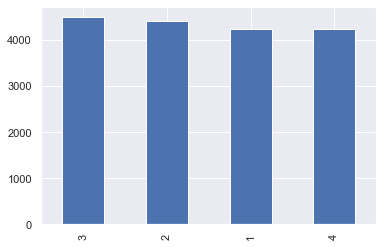

In [16]:
# season
print(df['season'].value_counts())
df['season'].value_counts().plot(kind="bar")

In [17]:
df['temp'].describe()

count    17379.000000
mean        20.376474
std          7.894801
min          0.820000
25%         13.940000
50%         20.500000
75%         27.060000
max         41.000000
Name: temp, dtype: float64

<AxesSubplot:>

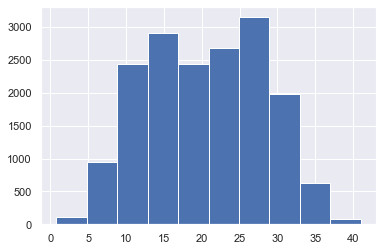

In [18]:
df['temp'].hist()

# binning

In [19]:
df.loc[df['temp']<=0, 'temp_band1'] = 1
df.loc[(df['temp']>0) & (df['temp']<=13), 'temp_band1'] = 2
df.loc[(df['temp']>13) & (df['temp']<=20), 'temp_band1'] = 3
df.loc[(df['temp']>20) & (df['temp']<=27), 'temp_band1'] = 4
df.loc[(df['temp']>27) & (df['temp']<=45), 'temp_band1'] = 5
df.loc[df['temp']>45, 'temp_band1'] = 6

In [20]:
df['temp_band1'] = df['temp_band1'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
 12  year        17379 non-null  int64         
 13  month       17379 non-null  int64         
 14  day         17379 non-null  int64         
 15  hour        17379 non-null  int64         
 16  week        17379 non-n

In [21]:
def temp_bind(x):
    temp_band1 = 0
    if x<=0:
        temp_band1 = 1
    elif (x>0) & (x<=13):
        temp_band1 = 2
    elif (x>13) & (x<=20):
        temp_band1 = 3
    elif (x>20) & (x<=27):
        temp_band1 = 4
    elif (x>27) & (x<=45):
        temp_band1 = 5
    else:
        temp_band1 = 6
    return temp_band1
df['temp_band2'] = df['temp'].apply(lambda x: temp_bind(x))

In [22]:
df['temp_band3'] =pd.cut(df['temp'], bins=[-100,0,13,20,27,45,100], labels=[1,2,3,4,5,6])

In [23]:
df[['temp','temp_band1','temp_band2','temp_band3']].head(20)

,temp,temp_band1,temp_band2,temp_band3
0,9.84,2,2,2
1,9.02,2,2,2
2,9.02,2,2,2
3,9.84,2,2,2
4,9.84,2,2,2
5,9.84,2,2,2
6,9.02,2,2,2
7,8.20,2,2,2
8,9.84,2,2,2
9,13.12,3,3,3


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
 12  year        17379 non-null  int64         
 13  month       17379 non-null  int64         
 14  day         17379 non-null  int64         
 15  hour        17379 non-null  int64         
 16  week        17379 non-n

In [25]:
df00 = df.drop(['casual', 'registered', 'datetime', 'temp_band3', 'temp_band3'], axis=1)

In [26]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   count       10886 non-null  float64
 9   year        17379 non-null  int64  
 10  month       17379 non-null  int64  
 11  day         17379 non-null  int64  
 12  hour        17379 non-null  int64  
 13  week        17379 non-null  int64  
 14  temp_band1  17379 non-null  int32  
 15  temp_band2  17379 non-null  int64  
dtypes: float64(4), int32(1), int64(11)
memory usage: 2.2 MB


# score00

In [27]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df00
target_met = 'count'
# ==================================================

# X, y split
train_met = df_met[df_met[target_met].notna()]
X_train_test_met = train_met.drop(target_met, axis=1)
y_train_test_met = train_met[target_met]

# estimators=
regressor_models = [
                    # LinearRegression      (),
                    DecisionTreeRegressor (random_state=0),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    # XGBRegressor          (random_state=0),
                    # LGBMRegressor         (random_state=0),
                    # CatBoostRegressor     (random_state=0, verbose=0),
                    ]

# scorings=
regressor_scorers = {'MSE':'neg_mean_squared_error',
                     'RMSE':'neg_root_mean_squared_error',
                     'MSLE':'neg_mean_squared_log_error',
                    #  'MAE':'neg_mean_absolute_error',
                     }

# cv=
kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# cross_validate loop
for model in regressor_models:
    
    cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
                                scoring=regressor_scorers,
                                cv=kf,
                                return_train_score=True, return_estimator=True)
    
    print('-' * 40)
    print('model  =', model.__class__.__name__)
    # print('params =', model.get_params(deep=True))
    
    # regression metrics
    print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
          'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()), '\n'
          'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()), '\n'
          'RMSLE  = {}  '.format(np.sqrt(- cv_results['test_MSLE'].mean()))
        #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
          )

----------------------------------------
model  = DecisionTreeRegressor
MSE    = 3397.8848878816143   
RMSE   = 58.23278715242243   
MSLE   = 0.18798651478650377   
RMSLE  = 0.4335741168318328  
----------------------------------------
model  = RandomForestRegressor
MSE    = 1656.37424331636   
RMSE   = 40.66531866994167   
MSLE   = 0.10853450994434304   
RMSLE  = 0.3294457617641226  


# lec

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
 12  year        17379 non-null  int64         
 13  month       17379 non-null  int64         
 14  day         17379 non-null  int64         
 15  hour        17379 non-null  int64         
 16  week        17379 non-n

In [29]:
train_cp = train.copy()
train_cp.shape

(10886, 12)

In [30]:
train_cp.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot:>

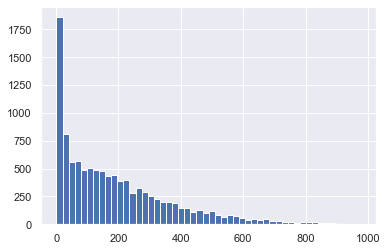

In [31]:
# mission 1 : cr = casual + registered
train_cp['cr'] = train_cp['casual'] + train_cp['registered']
train_cp['cr'].hist(bins=50)

<AxesSubplot:>

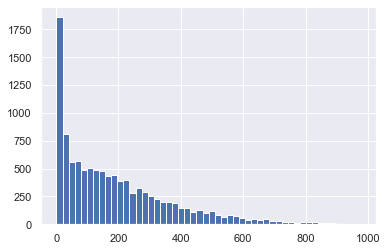

In [32]:
# mission 2 : cr != count
train_cp['count'].hist(bins=50)

In [33]:
train_cp[train_cp['count'] != train_cp['cr']]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,cr


In [34]:
del train_cp

In [35]:
train = train.drop(['casual', 'registered'], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [36]:
from datetime import datetime as dt
train['datetime'] = pd.to_datetime(train['datetime'])
# train['datetime'] = train['datetime'].astype('datetime64')

train['year']  = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day']   = train['datetime'].dt.day
train['hour']  = train['datetime'].dt.hour
train['week']  = train['datetime'].dt.dayofweek
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [37]:
from datetime import datetime as dt
X_sub['datetime'] = pd.to_datetime(X_sub['datetime'])
# X_sub['datetime'] = X_sub['datetime'].astype('datetime64')

X_sub['year']  = X_sub['datetime'].dt.year
X_sub['month'] = X_sub['datetime'].dt.month
X_sub['day']   = X_sub['datetime'].dt.day
X_sub['hour']  = X_sub['datetime'].dt.hour
X_sub['week']  = X_sub['datetime'].dt.dayofweek
X_sub.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


## corr

<AxesSubplot:>

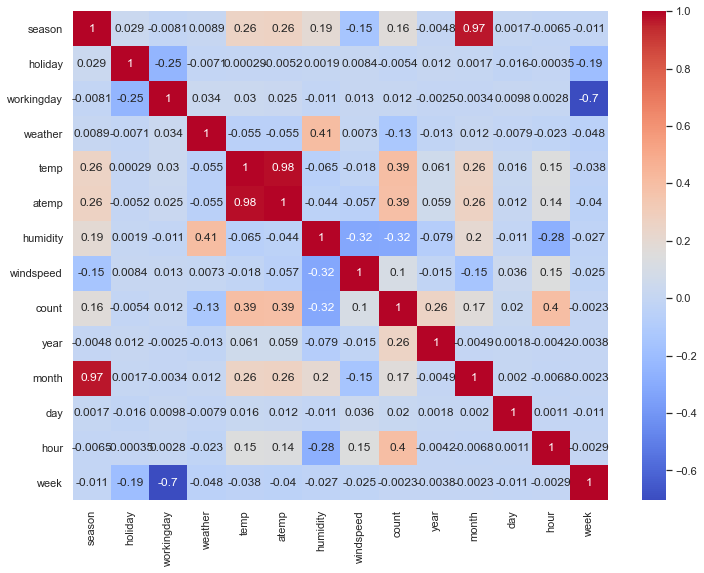

In [38]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [39]:
# count    & temp, atemp, hour
# temp     & atemp      :  0.98
# season   & month      :  0.97
# week     & workingday : -0.7
# humidity & weather    :  0.41

## PCA

In [40]:
# PCA전 반드시 outlier, log, scale 처리
train['year'] = np.log1p(train['year'])
X_sub['year'] = np.log1p(X_sub['year'])

train['year'].head()

0    7.606885
1    7.606885
2    7.606885
3    7.606885
4    7.606885
Name: year, dtype: float64

In [41]:
train['year'] = np.log1p(train['year'])
X_sub['year'] = np.log1p(X_sub['year'])

train['year'].head()

0    2.152562
1    2.152562
2    2.152562
3    2.152562
4    2.152562
Name: year, dtype: float64

In [42]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.152562,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2.152562,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2.152562,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.152562,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2.152562,1,1,4,5


In [43]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,week
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2.152591,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.000029,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2.152562,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2.152562,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2.152620,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2.152620,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2.152620,12.000000,19.000000,23.000000,6.000000


<AxesSubplot:xlabel='season', ylabel='count'>

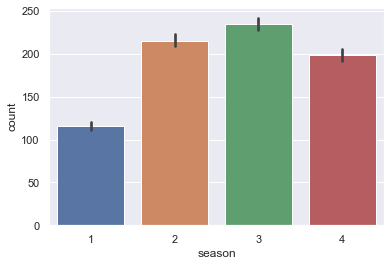

In [44]:
sns.barplot(x='season', y='count', data=train)

<AxesSubplot:xlabel='month', ylabel='count'>

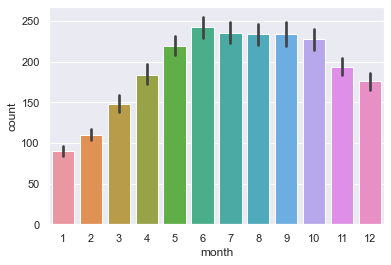

In [45]:
sns.barplot(x='month', y='count', data=train)

In [46]:
pd.crosstab(train['season'], train['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


In [47]:
pd.crosstab(X_sub['season'], X_sub['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,545,440,48,0,0,0,0,0,0,0,0,523
2,0,0,524,528,576,48,0,0,0,0,0,0
3,0,0,0,0,0,480,576,563,144,0,0,0
4,0,0,0,0,0,0,0,0,384,540,526,48


In [48]:
# target sep
X_train_test = train.drop('count', axis=1)
y_train_test = train['count']

In [49]:
# scale : int는 모두 scale 가능. datetime 제외
scale_cols = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 
              'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'week']

st = StandardScaler()

st.fit(X_train_test[scale_cols])

X_train_test[scale_cols] = st.transform(X_train_test[scale_cols])
X_sub[scale_cols]        = st.transform(X_sub[scale_cols])

X_train_test = X_train_test.drop('datetime', axis=1)
X_sub        = X_sub.drop('datetime', axis=1)

X_train_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week
0,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,-1.003866,-1.603121,-1.64207,-1.668944,0.990793
1,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-1.003866,-1.603121,-1.64207,-1.524341,0.990793
2,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-1.003866,-1.603121,-1.64207,-1.379739,0.990793
3,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-1.003866,-1.603121,-1.64207,-1.235137,0.990793
4,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-1.003866,-1.603121,-1.64207,-1.090534,0.990793


In [50]:
# 'temp', 'atemp' : PCA 전 데이터 단위 일치시켜야 함
pca = PCA(n_components=1)
X_train_test['pca_temp'] = pca.fit_transform(X_train_test[['temp', 'atemp']])
X_sub['pca_temp']        = pca.fit_transform(X_sub[['temp', 'atemp']])

print(pca.explained_variance_ratio_)

X_train_test = X_train_test.drop(['temp', 'atemp'], axis=1)
X_sub        = X_sub.drop(['temp', 'atemp'], axis=1)

[0.99596815]


In [51]:
X_train_test.head()

,season,holiday,workingday,weather,humidity,windspeed,year,month,day,hour,week,pca_temp
0,-1.349864,-0.17149,-1.460672,-0.660178,0.993213,-1.567754,-1.003866,-1.603121,-1.64207,-1.668944,0.990793,1.715722
1,-1.349864,-0.17149,-1.460672,-0.660178,0.941249,-1.567754,-1.003866,-1.603121,-1.64207,-1.524341,0.990793,1.853559
2,-1.349864,-0.17149,-1.460672,-0.660178,0.941249,-1.567754,-1.003866,-1.603121,-1.64207,-1.379739,0.990793,1.853559
3,-1.349864,-0.17149,-1.460672,-0.660178,0.681430,-1.567754,-1.003866,-1.603121,-1.64207,-1.235137,0.990793,1.715722
4,-1.349864,-0.17149,-1.460672,-0.660178,0.681430,-1.567754,-1.003866,-1.603121,-1.64207,-1.090534,0.990793,1.715722


In [52]:
X_train_test['season'].unique()

array([-1.34986372, -0.45390515,  0.44205341,  1.33801198])

In [53]:
X_train_test['month'].unique()

array([-1.60312148, -1.31277958, -1.02243768, -0.73209579, -0.44175389,
       -0.15141199,  0.1389299 ,  0.4292718 ,  0.7196137 ,  1.00995559,
        1.30029749,  1.59063939])

In [54]:
X_train_test[['season', 'month']].value_counts().sort_values()

season     month    
-1.349864  -1.603121    884
           -1.312780    901
           -1.022438    901
-0.453905  -0.732096    909
 0.442053   0.719614    909
 1.338012   1.009956    911
            1.300297    911
-0.453905  -0.441754    912
           -0.151412    912
 0.442053   0.138930    912
            0.429272    912
 1.338012   1.590639    912
dtype: int64

## week & workingday

In [55]:
pd.crosstab(train['week'], train['workingday']).T

week,0,1,2,3,4,5,6
workingday,,,,,,,
0,239,0,24,0,48,1584,1579
1,1312,1539,1527,1553,1481,0,0


In [56]:
# train['working1_w04'] = 1 0
# train['working0_w56'] = 1 0

train['w04'] = train['week'].apply(lambda x: 1 if (x == 5) or (x == 6) else 0)
train['w04'].value_counts()

0    7723
1    3163
Name: w04, dtype: int64

In [57]:
train.loc[(train['workingday'] == 1) & (train['w04'] == 0), 'working1_w04'] = 1
train.loc[(train['workingday'] == 1) & (train['w04'] == 1), 'working1_w04'] = 0

In [58]:
train['working1_w04'].value_counts()

1.0    7412
Name: working1_w04, dtype: int64

In [59]:
train.loc[(train['workingday'] == 0) & (train['w04'] == 0), 'working0_w56'] = 0
train.loc[(train['workingday'] == 0) & (train['w04'] == 1), 'working0_w56'] = 1

In [60]:
train['working0_w56'].value_counts()

1.0    3163
0.0     311
Name: working0_w56, dtype: int64

## lambda

In [61]:
train['working1_peak'] = train[['workingday','week']].apply(lambda x : (1,0) [x['workingday']==1   and  (x['week']!=5 or x['week']!=6) ], axis=1)
train['working1_peak'].value_counts()

0    7412
1    3474
Name: working1_peak, dtype: int64

In [62]:
train['working0_peak'] = train[['workingday','week']].apply(lambda x : (1,0) [x['workingday']==0   and  (x['week']==5 or x['week']==6) ], axis=1)
train['working0_peak'].value_counts()

1    7723
0    3163
Name: working0_peak, dtype: int64

In [63]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,week,w04,working1_w04,working0_w56,working1_peak,working0_peak
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.152562,1,1,0,5,1,NaN,1.0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2.152562,1,1,1,5,1,NaN,1.0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2.152562,1,1,2,5,1,NaN,1.0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.152562,1,1,3,5,1,NaN,1.0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2.152562,1,1,4,5,1,NaN,1.0,1,0


## hour

<AxesSubplot:xlabel='hour', ylabel='count'>

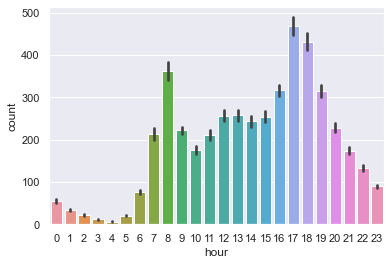

In [64]:
sns.barplot(x='hour', y='count', data=train)

<AxesSubplot:xlabel='hour', ylabel='count'>

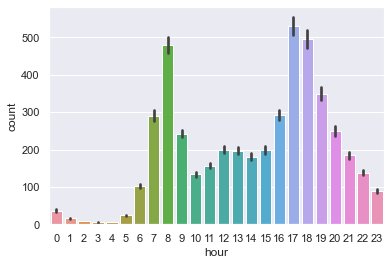

In [65]:
# 평일 : 8, 17, 18
sns.barplot(x='hour', y='count', data=train[train['workingday'] == 1])

<AxesSubplot:xlabel='hour', ylabel='count'>

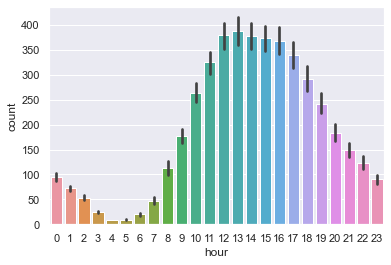

In [66]:
# 주말 : 12, 13, 14, 15, 16
sns.barplot(x='hour', y='count', data=train[train['workingday'] == 0])

In [67]:
# 8 or 17~18
train['hour_peak'] = train[['workingday','hour']].apply(lambda x : (1,0) [x['workingday']==1 and (x['hour']==8 or (17 <= x['hour'] <=18)) ], axis=1)
train['hour_peak'].value_counts()

1    9954
0     932
Name: hour_peak, dtype: int64

In [68]:
# 12, 13, 14, 15, 16
train['hour_peak'] = train[['workingday','hour']].apply(lambda x : (1,0) [x['workingday']==0 and (10 <= x['hour']  <= 19)], axis=1)
train['hour_peak'].value_counts()

1    9436
0    1450
Name: hour_peak, dtype: int64

## temp vs. count

In [69]:
train['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

<AxesSubplot:>

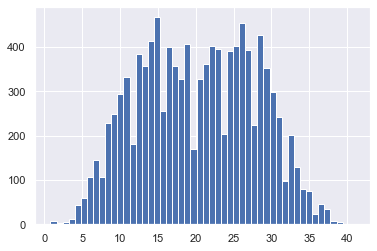

In [70]:
train['temp'].hist(bins=50)

<AxesSubplot:xlabel='temp', ylabel='Density'>

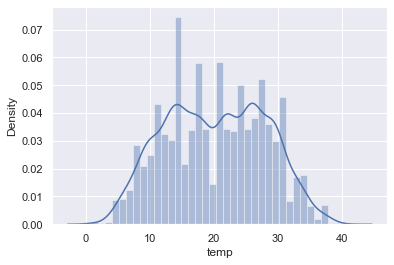

In [71]:
sns.distplot(train['temp']) # 10~30

<AxesSubplot:xlabel='humidity', ylabel='Density'>

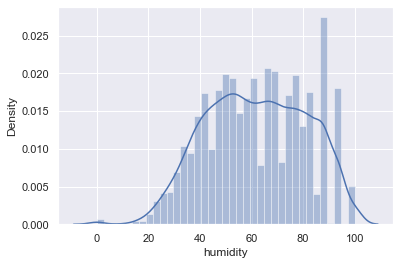

In [72]:
sns.distplot(train['humidity']) # 30~90

<AxesSubplot:xlabel='weather', ylabel='Density'>

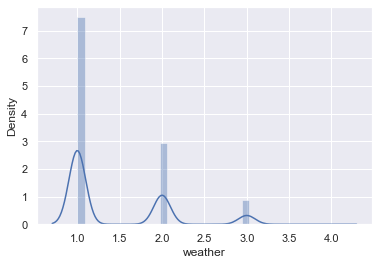

In [73]:
sns.distplot(train['weather']) # 1, 2

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

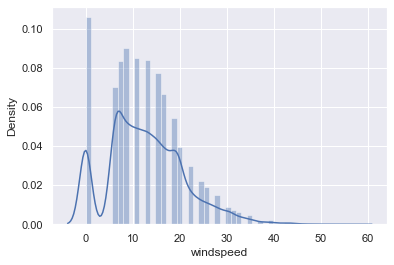

In [74]:
sns.distplot(train['windspeed'])

In [75]:
# cond : temp 10~30, humidity 30~90, weather 1~2
train['weather_peak'] = train[['temp','humidity', 'weather', 'windspeed']].apply(
    lambda x : (1,0) [
        10 <= x['temp']      <= 30 and
        30 <= x['humidity']  <= 90 and
        1  <= x['weather']   <= 2  and
        0  <= x['windspeed'] <= 24
        ], axis=1)
train['weather_peak'].value_counts()

0    6506
1    4380
Name: weather_peak, dtype: int64

<AxesSubplot:xlabel='weather_peak', ylabel='Density'>

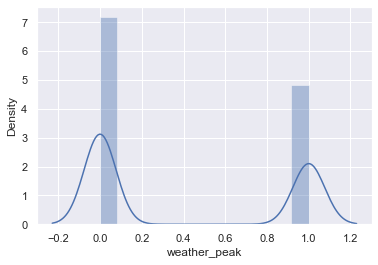

In [76]:
sns.distplot(train['weather_peak'])

## datetime

In [77]:
# 2011.06.19 holiday check
train[train['holiday'] == 1][['workingday', 'year', 'month', 'day']]

,workingday,year,month,day
372,0,2.152562,1,17
373,0,2.152562,1,17
374,0,2.152562,1,17
375,0,2.152562,1,17
376,0,2.152562,1,17
...,...,...,...,...
10257,0,2.152620,11,12
10258,0,2.152620,11,12
10259,0,2.152620,11,12
10260,0,2.152620,11,12


In [80]:
train[(train['month'] == 12) & (train['day'] == 25)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,week,w04,working1_w04,working0_w56,working1_peak,working0_peak,hour_peak,weather_peak


In [85]:
train[(train['month'] == 1) & (train['day'] == 1)].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,week,w04,working1_w04,working0_w56,working1_peak,working0_peak,hour_peak,weather_peak
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,...,1,0,5,1,NaN,1.0,1,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,...,1,1,5,1,NaN,1.0,1,0,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,...,1,2,5,1,NaN,1.0,1,0,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,...,1,3,5,1,NaN,1.0,1,0,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,...,1,4,5,1,NaN,1.0,1,0,1,1


In [88]:
df00 = pd.concat([train, X_sub])
df00.shape

(17379, 23)

In [89]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10886 non-null  datetime64[ns]
 1   season         17379 non-null  float64       
 2   holiday        17379 non-null  float64       
 3   workingday     17379 non-null  float64       
 4   weather        17379 non-null  float64       
 5   temp           10886 non-null  float64       
 6   atemp          10886 non-null  float64       
 7   humidity       17379 non-null  float64       
 8   windspeed      17379 non-null  float64       
 9   count          10886 non-null  float64       
 10  year           17379 non-null  float64       
 11  month          17379 non-null  float64       
 12  day            17379 non-null  float64       
 13  hour           17379 non-null  float64       
 14  week           17379 non-null  float64       
 15  w04            10886

In [90]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df00
target_met = 'count'
# ==================================================

# X, y split
train_met = df_met[df_met[target_met].notna()]
X_train_test_met = train_met.drop(target_met, axis=1)
y_train_test_met = train_met[target_met]

# estimators=
regressor_models = [
                    LinearRegression      (),
                    DecisionTreeRegressor (random_state=0),
                    Ridge                 (random_state=0),
                    Lasso                 (random_state=0),
                    ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

# scorings=
regressor_scorers = {'MSE':'neg_mean_squared_error',
                     'RMSE':'neg_root_mean_squared_error',
                    #  'MSLE':'neg_mean_squared_log_error',
                    #  'MAE':'neg_mean_absolute_error',
                     }

# cv=
kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# cross_validate loop
for model in regressor_models:
    
    cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
                                scoring=regressor_scorers,
                                cv=kf,
                                return_train_score=True, return_estimator=True)
    
    print('-' * 40)
    print('model  =', model.__class__.__name__)
    # print('params =', model.get_params(deep=True))
    
    # regression metrics
    print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
          'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()),
        #   'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()),
        #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
          )

----------------------------------------
model  = LinearRegression
MSE    = nan   
RMSE   =  nan  
----------------------------------------
model  = DecisionTreeRegressor
MSE    = nan   
RMSE   =  nan  
----------------------------------------
model  = Ridge
MSE    = nan   
RMSE   =  nan  
----------------------------------------
model  = Lasso
MSE    = nan   
RMSE   =  nan  
----------------------------------------
model  = ElasticNet
MSE    = nan   
RMSE   =  nan  
----------------------------------------
model  = RandomForestRegressor
MSE    = nan   
RMSE   =  nan  
----------------------------------------
model  = XGBRegressor
MSE    = nan   
RMSE   =  nan  
----------------------------------------
model  = LGBMRegressor
MSE    = nan   
RMSE   =  nan  
----------------------------------------
model  = CatBoostRegressor
MSE    = 1273.439006205232   
RMSE   =  35.641278750216124  


In [78]:
break

SyntaxError: 'break' outside loop (Temp/ipykernel_17380/668683560.py, line 1)